In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

#Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import scipy.stats as sts


In [2]:
# Create path and load files
city_data_to_load = os.path.join('Resources/city_data.csv')
ride_data_to_load = os.path.join('Resources/ride_data.csv')

In [3]:
# Read the city data file and store it in a pandas DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Start inspecting the data in city_data.csv

In [6]:
# Get the columns and the rows that are not null
city_data_df.count()


city            120
driver_count    120
type            120
dtype: int64

In [7]:
# Double check
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
# Get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# Get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# Get the number of data points from the Urban cities
sum(city_data_df["type"] =="Urban")


66

In [11]:
# Get the number of data points from the Suburban cities
sum(city_data_df["type"] =="Suburban")

36

In [12]:
# Get the number of data points from the Rural cities
sum(city_data_df["type"] =="Rural")

18

In [13]:
# Start inspecting the data in ride_data.csv

In [14]:
# Get the columns and the rows that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [15]:
#Double check
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [16]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [17]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [18]:
# Create the Urban city DataFrame
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

# Verify
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [19]:
# Create the Suburban city DataFrame
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]

#Verify
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [20]:
# Create the Rural cities DataFrame
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

#Verify
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [21]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]

# Verify
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [22]:
# Get the number of rides for suburban cities
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

# Verify
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [23]:
# Get the number of rides for rural cities
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

#Verify
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [24]:
# Get average fare for each city in the urban cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]

# Verify
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [25]:
# Get the average fare for each city in the suburban cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]

# Verify
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [26]:
# Get the average fare for each city in the rural cities.
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

# Verify
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [27]:
# Get the average number of drivers for each urban city
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]

# Verify
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [28]:
# Get the average number of drivers for each suburban city.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

# Verify
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [29]:
# Get the average number of drivers for each rural city
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

# Verify - Going forward, these lines of code can be in the same cell box for efficiency.
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

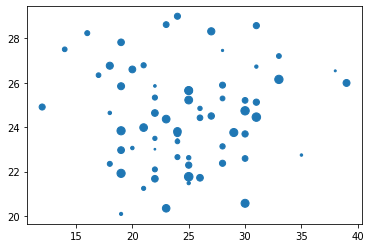

In [30]:
# Build the scatter plots for urban cities. set the size to # urban driver count
plt.scatter(urban_ride_count, urban_avg_fare, s=urban_driver_count)

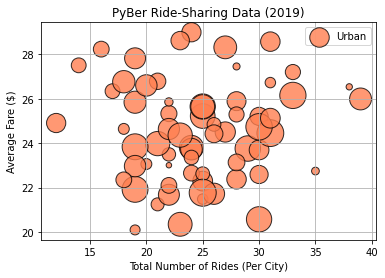

In [31]:
# Plots too small, increase size by a factor of 10 and format with title, color, etc
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, c="coral", edgecolor="black", linewidths=1, alpha=0.8, label="Urban")

# Create title
plt.title("PyBer Ride-Sharing Data (2019)")

#Create y label
plt.ylabel("Average Fare ($)")

# Create x label
plt.xlabel("Total Number of Rides (Per City)")

# Add gridlines
plt.grid(True)

# Add the legend
plt.legend()

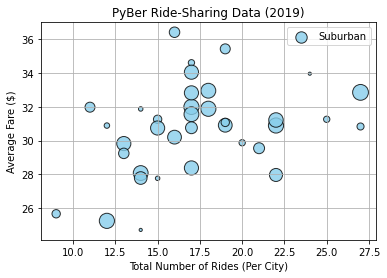

In [32]:
# Build the scatter plots for suburban cities. I copied the code from urban and input "suburban", where necessary and chose another color
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, c="skyblue", edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")

# Create title
plt.title("PyBer Ride-Sharing Data (2019)")

#Create y label
plt.ylabel("Average Fare ($)")

# Create x label
plt.xlabel("Total Number of Rides (Per City)")

# Add gridlines
plt.grid(True)

# Add the legend
plt.legend()

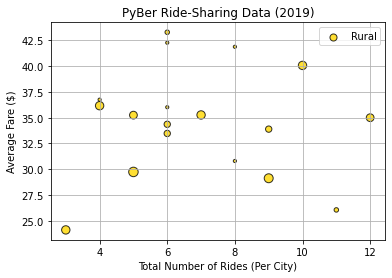

In [33]:
# Build the scatter plots for rural cities. I copied the code from urban and input "rural", where necessary and chose another color
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, c="gold", edgecolor="black", linewidths=1, alpha=0.8, label="Rural")

# Create title
plt.title("PyBer Ride-Sharing Data (2019)")

#Create y label
plt.ylabel("Average Fare ($)")

# Create x label
plt.xlabel("Total Number of Rides (Per City)")

# Add gridlines
plt.grid(True)

# Add the legend
plt.legend()

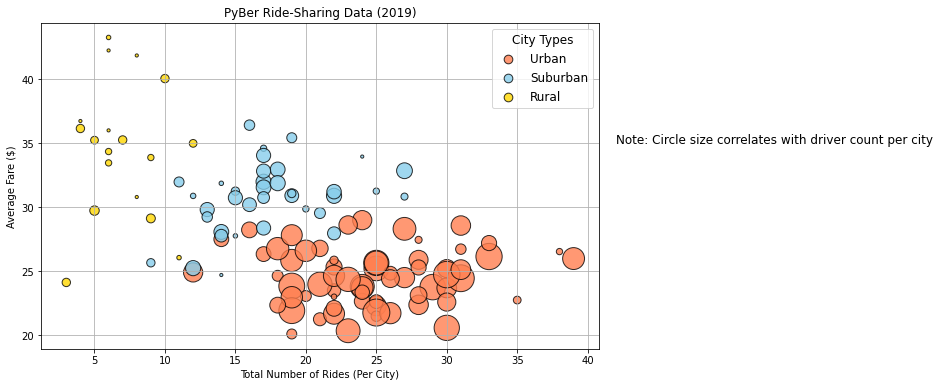

In [34]:
# Add the scatter charts for each type of city: I copied from each of the cells above

# Before entering the code for each chart, set the figure size
plt.subplots(figsize=(10, 6))

plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, c="coral", edgecolor="black", linewidths=1, alpha=0.8, label="Urban")
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, c="skyblue", edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, c="gold", edgecolor="black", linewidths=1, alpha=0.8, label="Rural")

# Incorporate the other graph properties (copied from the cells above)
# Create title
plt.title("PyBer Ride-Sharing Data (2019)")

#Create y label
plt.ylabel("Average Fare ($)")

# Create x label
plt.xlabel("Total Number of Rides (Per City)")

# Add gridlines
plt.grid(True)

# Create the legend (size, etc)
# Declare a variable for the legend function snd set size, etc.
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")

# Use legendHandles to set the font size of the marker in the legend to a fized size. Inside the brackets, add the list element
# for the number of markers in the legend.
# Set for index 0 - Urban
lgnd.legendHandles[0]._sizes = [75]

# Set for index 1 - Suburban
lgnd.legendHandles[1]._sizes = [75]

# Set for index 2 - Rural
lgnd.legendHandles[2]._sizes = [75]

# Set font size for legend title
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")

# Show the plot
plt.show()

In [35]:
# Use the describe() function on the urban, suburban, and rural DataFrames.

# Get summary statistics of urban dataframe
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [36]:
# Get summary statistics of suburban DataFrame.
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [37]:
# Get summary statistics of rural DataFrame.
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [38]:
# Calculate the summary statistics of the ride count for each city type.

#Get summary statistics for Urban.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [39]:
#Get summary statistics for Suburban.
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [40]:
#Get summary statistics for Rural.
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [41]:
# Calculate the mean of the ride count for each city type - round to two decimal places.
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [42]:
# Calculate the median of the ride count for each city type. -
# I copied the above script and replaced "mean" with "median"
urban_ride_count.median(), suburban_ride_count.median(), rural_ride_count.median()

(24.0, 17.0, 6.0)

In [43]:
# Calculate the mode of the ride count for each city type
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [45]:
# Calculate the measures of central tendency for the ride count for the urban cities.

# Mean - set variable to equal np.mean(ride count), then print with a statement
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

# Median - set variable to equal np.median(ride count), then print with a statement
median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

# Mode - set variable equal to sts.mode(ride count), then print with a statement
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")


The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [46]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
# Copied above script and replaced "urban" with "suburban", where applicable.

# Mean - set variable to equal np.mean(ride count), then print with a statement
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

# Median - set variable to equal np.median(ride count), then print with a statement
median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

# Mode - set variable equal to sts.mode(ride count), then print with a statement
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [47]:
# Calculate the measures of central tendency for the ride count for the rural cities.
# Copied above script and replaced "suburban" with "rural", where applicable.

# Mean - set variable to equal np.mean(ride count), then print with a statement
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

# Median - set variable to equal np.median(ride count), then print with a statement
median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

# Mode - set variable equal to sts.mode(ride count), then print with a statement
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [51]:
# In order to get the summar statistics for the average fare for each city type, we'll need to get the data from the "fare" column in each
# city type DataFrame.

# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]

# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is ${mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).


In [55]:
# Get the fares for the suburban cities.
suburban_fares = suburban_cities_df["fare"]

# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is ${mode_suburban_fares}.")



The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is $ModeResult(mode=array([17.99]), count=array([3])).


In [53]:
# Get the fares for the rural cities.
rural_fares = rural_cities_df["fare"]

# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is ${mode_rural_fares}.")



The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is $ModeResult(mode=array([37.05]), count=array([2])).


In [63]:
# Get the driver count data from the urban cities
urban_drivers = urban_cities_df['driver_count']

# Calculate the measures of central tendency for the driver count data for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean driver count for urban trips is {round(mean_urban_drivers)}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median driver count for urban trips is {round(median_urban_drivers)}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode driver count for urban trips is {mode_urban_drivers}.")


The mean driver count for urban trips is 37.
The median driver count for urban trips is 37.
The mode driver count for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [64]:
# Get the driver count data from the suburban cities
suburban_drivers = suburban_cities_df['driver_count']

# Calculate the measures of central tendency for the driver count data for the suburban cities.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean driver count for suburban trips is {round(mean_suburban_drivers)}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median driver count for suburban trips is {round(median_suburban_drivers)}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode driver count for suburban trips is {mode_suburban_drivers}.")

The mean driver count for suburban trips is 14.
The median driver count for suburban trips is 16.
The mode driver count for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [65]:
# Get the driver count data from the rural cities
rural_drivers = rural_cities_df['driver_count']

# Calculate the measures of central tendency for the driver count data for the rural cities.
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean driver count for rural trips is {round(mean_rural_drivers)}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median driver count for rural trips is {round(median_rural_drivers)}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode driver count for rural trips is {mode_rural_drivers}.")

The mean driver count for rural trips is 4.
The median driver count for rural trips is 4.
The mode driver count for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).
